<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
!pip install numpy pandas seaborn

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [9]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(URL)

In [11]:
boston_df=pd.read_csv(URL)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

We are going to generate the following inb order to explain the findings:

1 - For the "Median value of owner-occupied homes" provide a **[boxplot]**

2 - Provide a  **[bar plot]** for the Charles river variable

3 - Provide a **[boxplot]** for the **[MEDV]** variable vs the **[AGE]** variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4 - Provide a **[scatter plot]** to show the relationship between **Nitric oxide concentrations** and the proportion of non-retail business acres per town. What can you say about the relationship?

5 - Create a **[histogram]** for the pupil to teacher ratio variable

### Boxplot for Median value of owner-occupied homes (MEDV)

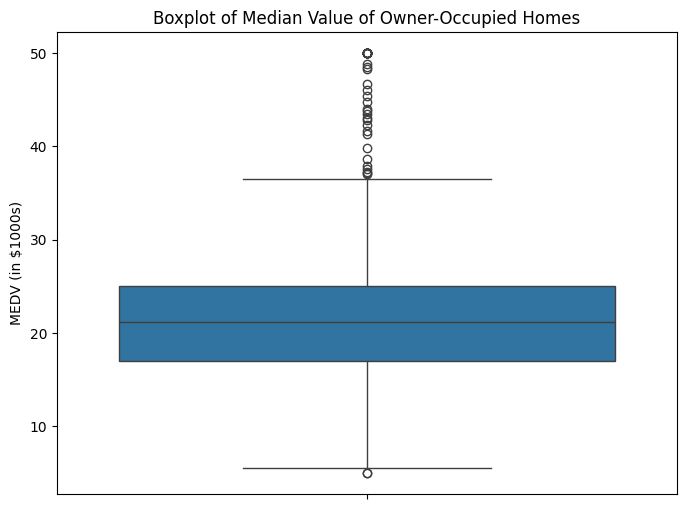

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV (in $1000s)')
plt.show()

### Bar plot for Charles River variable (CHAS)

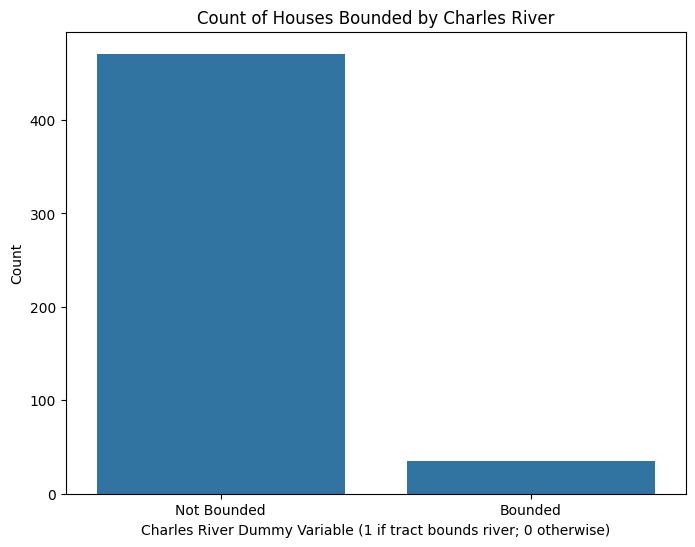

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Count of Houses Bounded by Charles River')
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

### Boxplot of MEDV vs AGE (Discretized)

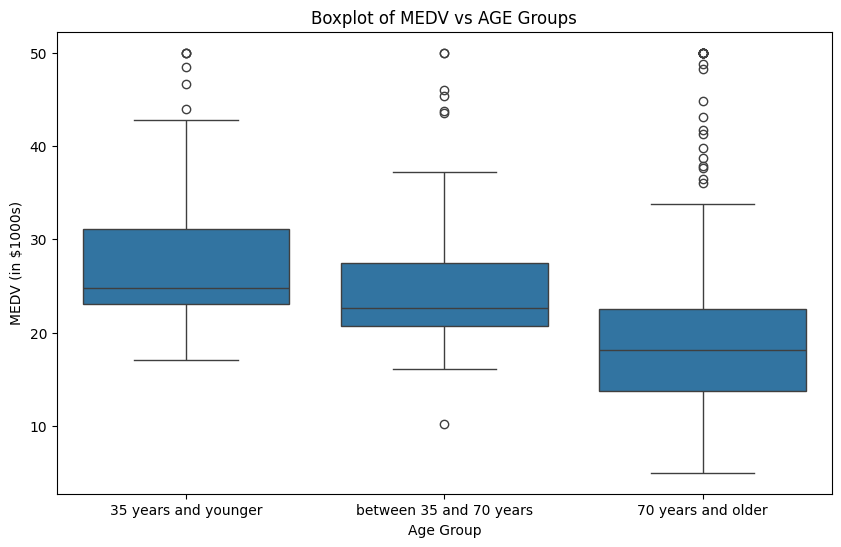

In [35]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV (in $1000s)')
plt.show()

### Scatter plot of NOX vs INDUS

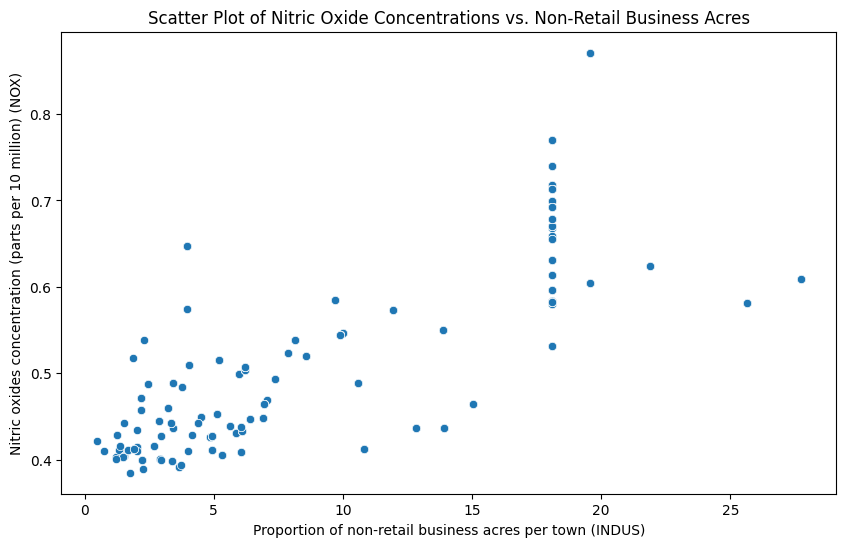

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxides concentration (parts per 10 million) (NOX)')
plt.show()

### Histogram for Pupil to Teacher Ratio (PTRATIO)

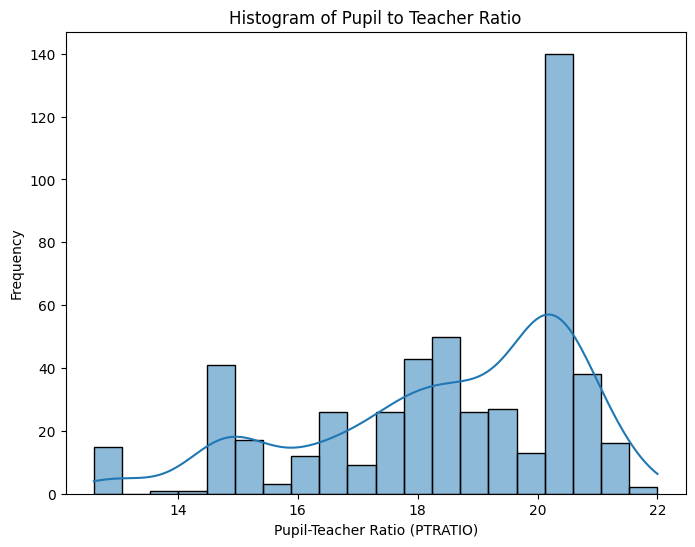

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=boston_df, x='PTRATIO', bins=20, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

Related to Descriptive Statistics and Visualizations (To determine)

here is the suggested values, tables and variables that might be part of the solution being drafted

1 - **[MEDV]** related to **[boxplot]**

2 - **[bar plot]** related ot **[CHAS]**

3 - **[boxplot]** related to **[MEDV]** vs **[AGE]** being about 3 groups **(age > 35, age < 35 and age > 70, age < 70 )**

4 - **[scatter plot]** realted to **[NOX]** vs **[INDUS]**

5 - **[Histogram]** related to **[PTRATIO]**



Using the appropiate tests to answer the questions

For each of the following questions;

Q1 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) To be determined(**[MEDV]** and **[CHAS]**).

Q2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Q3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) To be determined(**[NOX]** and **[INDUS]**).

Q4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) To be determined(**[MEDV]**).

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### T-test for Independent Samples (MEDV vs CHAS)

**Hypothesis:**

*   **Null Hypothesis (H₀):** There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river. ($\mu_1 = \mu_0$)
*   **Alternative Hypothesis (H₁):** There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river. ($\mu_1 \neq \mu_0$)

**Significance Level:** α = 0.05

In [24]:
# import scipy.stats as stats

# Separate the MEDV values for houses bounded by the Charles River (CHAS=1) and those not bounded (CHAS=0)
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# State the conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant difference in the median value of houses bounded by the Charles river and those not bounded.")
else:
    print("Conclusion: Since the p-value is not less than 0.05, we fail to reject the null hypothesis.")
    print("There is no significant difference in the median value of houses bounded by the Charles river and those not bounded.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
There is a significant difference in the median value of houses bounded by the Charles river and those not bounded.


### ANOVA Test (MEDV vs AGE Groups)

**Hypothesis:**

*   **Null Hypothesis (H₀):** There is no significant difference in the median value of houses among the different age groups. ($\mu_1 = \mu_2 = \mu_3$)
*   **Alternative Hypothesis (H₁):** At least one of the age groups has a significantly different median value of houses compared to the others. (Not all means are equal)

**Significance Level:** α = 0.05

In [25]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# Perform one-way ANOVA
# The ols function requires the formula 'dependent_variable ~ independent_variable'
model = ols('MEDV ~ AGE_group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# State the conclusion
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant difference in the median value of houses among the different age groups.")
else:
    print("\nConclusion: Since the p-value is not less than 0.05, we fail to reject the null hypothesis.")
    print("There is no significant difference in the median value of houses among the different age groups.")

                 sum_sq     df         F        PR(>F)
AGE_group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
There is a significant difference in the median value of houses among the different age groups.


/tmp/ipython-input-2091920510.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


### Pearson Correlation Test (NOX vs INDUS)

**Hypothesis:**

*   **Null Hypothesis (H₀):** There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ($\rho = 0$)
*   **Alternative Hypothesis (H₁):** There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ($\rho \neq 0$)

**Significance Level:** α = 0.05

In [26]:
# import scipy.stats as stats

# Perform the Pearson correlation test
pearson_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {pearson_coefficient}")
print(f"P-value: {p_value}")

# State the conclusion
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("\nConclusion: Since the p-value is not less than 0.05, we fail to reject the null hypothesis.")
    print("There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.7636514469209154
P-value: 7.913361061239639e-98

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


### Regression Analysis (MEDV vs DIS)

**Hypothesis:**

*   **Null Hypothesis (H₀):** The weighted distance to the five Boston employment centres has no significant impact on the median value of owner-occupied homes. ($\beta_{DIS} = 0$)
*   **Alternative Hypothesis (H₁):** The weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes. ($\beta_{DIS} \neq 0$)

**Significance Level:** α = 0.05

In [27]:
# import statsmodels.api as sm

# Define the independent variable (X) and the dependent variable (y)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# State the conclusion based on the p-value of the DIS coefficient
alpha = 0.05
dis_p_value = model.pvalues['DIS']

if dis_p_value < alpha:
    print("\nConclusion: Since the p-value for DIS is less than 0.05, we reject the null hypothesis.")
    print("There is a significant impact of weighted distance to employment centres on the median value of owner-occupied homes.")
    print(f"For each additional unit of weighted distance, the median value of homes is estimated to change by {model.params['DIS']:.3f} (in $1000s).")
else:
    print("\nConclusion: Since the p-value for DIS is not less than 0.05, we fail to reject the null hypothesis.")
    print("There is no significant impact of weighted distance to employment centres on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        23:30:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [43]:
# Create a dictionary to map current column names to full titles
column_titles = {
    'CRIM': 'per capita crime rate by town [CRIM]',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft. [ZN]',
    'INDUS': 'proportion of non-retail business acres per town [INDUS]',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise) [CHAS]',
    'NOX': 'nitric oxides concentration (parts per 10 million) [NOX]',
    'RM': 'average number of rooms per dwelling [RM]',
    'AGE': 'proportion of owner-occupied units built prior to 1940 [AGE]',
    'DIS': 'weighted distances to five Boston employment centres [DIS]',
    'RAD': 'index of accessibility to radial highways [RAD]',
    'TAX': 'full-value property-tax rate per $10,000 [TAX]',
    'PTRATIO': 'pupil-teacher ratio by town [PTRATIO]',
    'LSTAT': '% lower status of the population [LSTAT]',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s [MEDV]'
}

# Create a copy of the DataFrame to avoid modifying the original
boston_df_renamed = boston_df.rename(columns=column_titles)

# Display the first 10 rows with renamed columns
display(boston_df_renamed.head(-10))

,Unnamed: 0,per capita crime rate by town [CRIM],"proportion of residential land zoned for lots over 25,000 sq.ft. [ZN]",proportion of non-retail business acres per town [INDUS],Charles River dummy variable (1 if tract bounds river; 0 otherwise) [CHAS],nitric oxides concentration (parts per 10 million) [NOX],average number of rooms per dwelling [RM],proportion of owner-occupied units built prior to 1940 [AGE],weighted distances to five Boston employment centres [DIS],index of accessibility to radial highways [RAD],"full-value property-tax rate per $10,000 [TAX]",pupil-teacher ratio by town [PTRATIO],% lower status of the population [LSTAT],Median value of owner-occupied homes in $1000's [MEDV],AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,18.07,13.6,70 years and older
492,492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,13.35,20.1,70 years and older
493,493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,12.01,21.8,between 35 and 70 years
494,494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,13.59,24.5,between 35 and 70 years


#Analysis of the results of the statistical tests

##(T-test, ANOVA, Pearson Correlation, and Regression Analysis) performed on the Boston Housing dataset.

### T-test Conclusion (MEDV vs CHAS)

The independent samples T-test was performed to determine if there is a significant difference in the median value of houses bounded by the Charles river (CHAS=1) compared to those not bounded (CHAS=0).

*   **Null Hypothesis (H0):** There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river. ($\mu_1 = \mu_0$)
*   **Alternative Hypothesis (H1):** There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river. ($\mu_1 \neq \mu_0$)
*   **Significance Level:** α = 0.05

The T-test resulted in a T-statistic of 3.996 and a p-value of 7.3906e-05.

Since the calculated p-value (7.3906e-05) is less than the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is a significant difference in the median value of houses bounded by the Charles river and those not bounded. This suggests that being bounded by the Charles River has a statistically significant impact on the median value of homes in the Boston area, with houses near the river tending to have a different median value than those further away.

### ANOVA Test Conclusion (MEDV vs AGE Groups)

The One-Way ANOVA test was conducted to determine if there is a significant difference in the median value of houses (MEDV) across different age groups of owner-occupied units, where the AGE variable was discretized into three groups: '35 years and younger', 'between 35 and 70 years', and '70 years and older'.

*   **Null Hypothesis (H₀):** There is no significant difference in the median value of houses among the different age groups. ($\mu_1 = \mu_2 = \mu_3$)
*   **Alternative Hypothesis (H₁):** At least one of the age groups has a significantly different median value of houses compared to the others. (Not all means are equal)
*   **Significance Level:** α = 0.05

The ANOVA test resulted in an F-statistic of 36.41 and a p-value of 1.7105e-15 (from the `anova_table`).

Since the calculated p-value (1.7105e-15) is much less than the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is a significant difference in the median value of houses among the different age groups. This suggests that the age of owner-occupied units built prior to 1940 has a statistically significant impact on the median value of homes. The boxplot visualization for MEDV vs AGE Groups further supports this conclusion by showing noticeable differences in the median MEDV values and the spread of values across the three age categories.

### Pearson Correlation Test Conclusion (NOX vs INDUS)

The Pearson Correlation test was conducted to assess the linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

*   **Null Hypothesis (H₀):** There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ($\rho = 0$)
*   **Alternative Hypothesis (H₁):** There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ($\rho \neq 0$)
*   **Significance Level:** α = 0.05

The Pearson Correlation test resulted in a Pearson correlation coefficient of 0.764 and a p-value of 7.913e-98.

Since the calculated p-value (7.913e-98) is much less than the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is a significant positive linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. The Pearson correlation coefficient of approximately 0.764 indicates a strong positive correlation. This means that as the proportion of non-retail business acres per town increases, the nitric oxide concentrations tend to increase as well.

The scatter plot of NOX vs INDUS visually supports this conclusion. The points on the scatter plot show a clear upward trend, indicating that higher values of INDUS are generally associated with higher values of NOX. The points are not perfectly aligned on a straight line, but the overall pattern suggests a strong positive linear association, consistent with the calculated correlation coefficient.

### Regression Analysis Conclusion (MEDV vs DIS)

A simple linear regression analysis was conducted to examine the impact of the weighted distance to five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

*   **Null Hypothesis (H₀):** The weighted distance to the five Boston employment centres has no significant impact on the median value of owner-occupied homes. ($\beta_{DIS} = 0$)
*   **Alternative Hypothesis (H₁):** The weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes. ($\beta_{DIS} \neq 0$)
*   **Significance Level:** α = 0.05

The regression analysis produced the following key results (from the OLS Regression Results summary):

*   **Coefficient for DIS:** 1.092
*   **P-value for DIS:** 1.21e-08 (very close to 0.000)

Since the p-value for the 'DIS' coefficient (1.21e-08) is much less than the significance level (α = 0.05), we reject the null hypothesis.

**Conclusion:** There is a significant impact of weighted distance to employment centres on the median value of owner-occupied homes.

Relating this back to the data, the coefficient for 'DIS' (1.092) suggests that for each additional unit of weighted distance from the five Boston employment centres, the median value of owner-occupied homes is estimated to increase by approximately 1.092 thousand dollars.

The regression output's low p-value for the DIS coefficient strongly supports this conclusion, indicating that the observed relationship is unlikely to be due to random chance. The R-squared value of 0.062 suggests that 'DIS' alone explains about 6.2% of the variance in 'MEDV', indicating that while significant, weighted distance is one of several factors influencing home values.

## Summary:

### Data Analysis Key Findings

*   The T-test between MEDV and CHAS revealed a statistically significant difference in median house values based on proximity to the Charles River (p-value = 7.3906e-05).

*   The ANOVA test among MEDV and different AGE groups showed a significant difference in median house values across these age categories (p-value = 1.7105e-15).

*   The Pearson Correlation test between NOX and INDUS indicated a strong positive linear relationship, meaning higher non-retail business acres are significantly associated with higher nitric oxide concentrations (correlation coefficient = 0.764, p-value = 7.913e-98).

*   The Regression Analysis of MEDV against DIS demonstrated a significant positive impact of the weighted distance to employment centers on median house values. For each unit increase in weighted distance, MEDV is estimated to increase by approximately \$1.092 thousand (p-value = 1.21e-08).

# Interpretation of plots


#1 -  Interpretation of the Boxplot for Median Value of Owner-Occupied Homes (MEDV)

## Based on the boxplot of the 'MEDV' variable:

1.  **Central Tendency:** The median value of owner-occupied homes, indicated by the line within the box, appears to be around $21,000 to $22,000. This represents the typical or middle value of home prices in this dataset.

2.  **Spread and Variability:** The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data. The length of the box suggests a moderate spread in the central half of the MEDV values. The whiskers extend to show the range of the data excluding outliers. The spread of the whiskers indicates the overall variability of home prices beyond the central 50%.

3.  **Potential Outliers:** The individual points plotted above the upper whisker represent potential outliers. These are houses with significantly higher median values compared to the majority of the data. This suggests that there are some properties in the dataset with unusually high values.

4.  **Distribution Summary:** The distribution of the median value of owner-occupied homes appears to be somewhat right-skewed, as indicated by the longer upper whisker and the presence of outliers on the higher end of the value range. The bulk of the home values are concentrated around the median and within the IQR, but there are also a number of homes with considerably higher values.

#2 - Interpretation of the Bar Plot for Charles River Variable (CHAS)

##Based on the bar plot of the 'CHAS' variable:

1.  **Category Representation:** The bar plot visually displays the counts of properties in the dataset based on whether they are bounded by the Charles River (CHAS=1) or not bounded (CHAS=0).

2.  **Distribution:** The plot clearly shows that the vast majority of properties in this dataset are *not* bounded by the Charles River (CHAS=0). The bar representing CHAS=0 is significantly taller than the bar representing CHAS=1.

3.  **Proportion:** The bar plot indicates a highly unequal distribution, with a much larger number of properties falling into the 'not bounded' category. This suggests that properties directly bordering the Charles River are relatively rare in this dataset compared to those that do not.

4.  **Visual Insight:** The visual representation quickly conveys that 'CHAS' is a categorical variable with two distinct classes, and that one class (not bounded) is much more prevalent than the other (bounded). This is important context for understanding the data and for subsequent statistical tests involving this variable.

#3 - Interpretation of the Boxplot for MEDV vs AGE Groups

## Based on the boxplot showing the Median value of owner-occupied homes (MEDV) against the discretized AGE variable:

1.  **Median MEDV across Age Groups:** The boxplot clearly shows a difference in the median MEDV values across the three age groups. The median MEDV for the '35 years and younger' group appears to be the highest, followed by the 'between 35 and 70 years' group, and the '70 years and older' group having the lowest median MEDV. This suggests that newer homes tend to have higher median values compared to older homes.

2.  **Spread and Variability:** The spread of MEDV values, represented by the height of the boxes (IQR) and the whiskers, also varies across the groups. The '35 years and younger' group seems to have a wider spread of MEDV values, indicating more variability in home prices within this newer age category. The '70 years and older' group appears to have a narrower spread, suggesting more consistent, generally lower, home values. The 'between 35 and 70 years' group has a moderate spread.

3.  **Potential Outliers:** Potential outliers are visible in all three age groups, represented by individual points beyond the whiskers. There appear to be some higher-value outliers in the '35 years and younger' and 'between 35 and 70 years' groups. The '70 years and older' group also shows some outliers, though they might be less extreme compared to the newer age groups.

4.  **Overall Trend:** The boxplot visually supports the conclusion that there is a relationship between the age of owner-occupied units and their median value. There is a clear trend of decreasing median MEDV as the age of the properties increases. This indicates that older homes, on average, have lower median values than newer homes in this dataset. This aligns with the findings from the ANOVA test which showed a significant difference in MEDV among the age groups.

#4 - Interpretation of the Scatter Plot for Nitric Oxide Concentrations (NOX) vs. Proportion of Non-Retail Business Acres (INDUS)

##Based on the scatter plot showing the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS):

1.  **Type of Relationship:** The scatter plot reveals a **positive and approximately linear relationship** between NOX and INDUS. As the proportion of non-retail business acres (INDUS) increases, the nitric oxide concentrations (NOX) generally tend to increase as well.

2.  **Strength of the Relationship:** The points on the scatter plot show a clear upward trend, but they are not perfectly aligned along a straight line. This suggests a **moderately strong to strong positive linear relationship**. There is some scatter around the trend line, indicating that while INDUS is a significant factor influencing NOX, other variables also play a role.

3.  **Patterns, Clusters, or Outliers:**
    *   **Upward Trend:** The most prominent pattern is the clear upward slope, confirming the positive association.
    *   **Density:** The points appear to be more densely clustered in the lower ranges of both INDUS and NOX, indicating that many towns have lower levels of both non-retail business acres and nitric oxide concentrations.
    *   **Spread Increases with INDUS:** As INDUS increases, the spread of NOX values for a given INDUS level appears to increase, suggesting more variability in NOX concentrations in areas with higher proportions of non-retail businesses.
    *   **Potential Outliers:** There might be a few points that lie further away from the general trend, which could be considered potential outliers, representing towns with unusually high or low NOX concentrations relative to their INDUS proportion.

4.  **Consistency with Pearson Correlation Test:** The visual interpretation of the scatter plot is **highly consistent** with the results of the Pearson Correlation test conducted previously. The Pearson correlation coefficient of approximately 0.764 indicated a strong positive linear correlation. The scatter plot visually confirms this strong positive association, where higher INDUS values are associated with higher NOX values, and the trend appears reasonably linear despite some spread. The visual pattern supports the statistical finding that the relationship is significant and positive.

#5 - Interpretation of the Histogram for Pupil to Teacher Ratio (PTRATIO)

##Based on the histogram of the 'PTRATIO' variable:

1.  **Distribution Shape:** The histogram shows that the distribution of the pupil-teacher ratio is **approximately unimodal** (having one main peak) and appears to be **slightly left-skewed**. The tail of the distribution extends more towards the lower values of PTRATIO.

2.  **Central Tendency:** The peak of the histogram, representing the mode, is located around a PTRATIO value of approximately 20. This suggests that the most frequent pupil-teacher ratio in the dataset is around 20 students per teacher. The mean and median would likely be slightly lower than the mode due to the left skew.

3.  **Spread and Range:** The PTRATIO values range roughly from a minimum of around 12 to a maximum of around 22. The spread of the data is concentrated within this range, with the majority of values falling within the central part of the distribution, around the peak.

4.  **Prominent Features:** The most prominent feature is the single, relatively tall peak around 20. There are no obvious gaps or significant outliers that stand out from the main body of the distribution. The frequencies drop off on either side of the peak, more gradually towards the lower end (contributing to the left skew) and more sharply towards the higher end.

In summary, the histogram indicates that the pupil-teacher ratios in this dataset are primarily centered around 20, with most towns having a ratio between approximately 15 and 22. The distribution is not perfectly symmetric and shows a slight tendency towards having more towns with ratios slightly below the peak than significantly above it.

## Summary:

### Data Analysis Key Findings

*   The median value of owner-occupied homes (MEDV) is approximately \$21,000 to \$22,000, with a right-skewed distribution indicating some properties have significantly higher values.

*   The vast majority of properties in the dataset are not bounded by the Charles River (CHAS=0), indicating that properties directly bordering the river are relatively rare.

*   There is a clear trend of decreasing median MEDV as the age of properties increases, with newer homes (35 years and younger) having the highest median values and older homes (70 years and older) having the lowest.

*   A strong positive and approximately linear relationship exists between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS), consistent with a Pearson correlation coefficient of approximately 0.764.

*   The distribution of the Pupil to Teacher Ratio (PTRATIO) is approximately unimodal and slightly left-skewed, with the most frequent ratio around 20 students per teacher.